In [1]:
import pandas as pd
import os

In [2]:
import pickle

In [3]:
topics_df = pd.read_csv('../joint_clean_data/topics.csv', index_col=0)

In [4]:
topics_df.head()

,goal_id,goal_domain_original,goal_name_type_original,goal_domain_LoW,goal_name_type_LoW,goal_domain_no_noise,goal_name_type_no_noise,goal_domain_mean_pos,goal_name_type_mean_pos,remove,...,label_attractor_hard_skill,label_attractor_soft_skill,label_attractor_tool,label_attractor_community,label_attractor_subjectivity,label_attractor_habits,label_attractor_career,label_attractor_fixing,label_attractor_art,label_attractor_health
0,19,творчество и создание нового изобразительное и...,не отстать от поезда современности получить зн...,"['творчество', 'и', 'создание', 'нового', 'изо...","['не', 'отстать', 'от', 'поезда', 'современнос...",творчество создание новое изобразительный иску...,отстать поезд современность получить знание но...,творчество создание новое изобразительный иску...,отстать поезд современность получить знание но...,0,...,1,1,0,1,0,1,1,1,0,NaN
1,20,универсальные компетенции гибкие навыки soft ...,самореализация получить знания в новой области...,"['универсальные', 'компетенции', '', 'гибкие',...","['самореализация', 'получить', 'знания', 'в', ...",универсальный компетенция гибкий навык soft s...,самореализация получить знание новый область ...,универсальный компетенция гибкий навык навык о...,самореализация получить знание новый область п...,0,...,1,0,1,0,1,0,1,0,1,NaN
2,21,иностранные языки гуманитарные знания и навык...,улучшенный образ жизни включиться в новый прое...,"['иностранные', 'языки', '', 'гуманитарные', '...","['улучшенный', 'образ', 'жизни', 'включиться',...",иностранный язык гуманитарный знание навык ин...,улучшить образ жизнь включиться новый проект д...,иностранный язык гуманитарный знание навык ино...,образ жизнь включиться новый проект деятельность,0,...,1,1,0,0,0,0,0,1,0,NaN
3,22,прикладные знания и навыки ручной труд информ...,обновление устаревшей информации развить имеющ...,"['прикладные', 'знания', 'и', 'навыки', '', 'р...","['обновление', 'устаревшей', 'информации', 'ра...",прикладной знание навык ручной труд информаци...,обновление устаревший информация развить иметь...,прикладной знание навык ручной труд информация...,обновление устаревший информация развить знани...,0,...,1,0,0,0,1,1,1,1,1,NaN
4,23,универсальные компетенции гибкие навыки soft ...,повышение результативности труда получить знан...,"['универсальные', 'компетенции', '', 'гибкие',...","['повышение', 'результативности', 'труда', 'по...",универсальный компетенция гибкий навык soft s...,повышение результативность труд получить знани...,универсальный компетенция гибкий навык планиро...,повышение результативность труд получить знани...,0,...,1,0,0,0,0,0,0,0,1,NaN


In [5]:
topics_df.columns

Index(['goal_id', 'goal_domain_original', 'goal_name_type_original',
       'goal_domain_LoW', 'goal_name_type_LoW', 'goal_domain_no_noise',
       'goal_name_type_no_noise', 'goal_domain_mean_pos',
       'goal_name_type_mean_pos', 'remove', 'are_first_steps_known',
       'is_time_certain', 'is_certainly_imagined', 'are_obstackles_expected',
       'topic_words', 'goal_words', 'topic_letters', 'goal_letters',
       'topic_aver_word_len', 'goal_aver_word_len', 'goal_verbs_counter',
       'goal_nouns_counter', 'goal_numr_counter', 'goal_adj_counter',
       'goal_digit_counter', 'label_attractor_knowledge',
       'label_attractor_hard_skill', 'label_attractor_soft_skill',
       'label_attractor_tool', 'label_attractor_community',
       'label_attractor_subjectivity', 'label_attractor_habits',
       'label_attractor_career', 'label_attractor_fixing',
       'label_attractor_art', 'label_attractor_health'],
      dtype='object')

In [6]:
topics = topics_df.copy()

In [7]:
topics.drop(columns=['goal_id', 'goal_domain_original', 'goal_domain_LoW', 'goal_name_type_LoW',
                   'goal_domain_no_noise', 'goal_domain_mean_pos'], inplace=True)

In [8]:
topics = topics[topics['remove'] == 0]

In [9]:
topics.drop(columns=['remove'], inplace=True)

In [10]:
topics.head()

,goal_name_type_original,goal_name_type_no_noise,goal_name_type_mean_pos,are_first_steps_known,is_time_certain,is_certainly_imagined,are_obstackles_expected,topic_words,goal_words,topic_letters,...,label_attractor_hard_skill,label_attractor_soft_skill,label_attractor_tool,label_attractor_community,label_attractor_subjectivity,label_attractor_habits,label_attractor_career,label_attractor_fixing,label_attractor_art,label_attractor_health
0,не отстать от поезда современности получить зн...,отстать поезд современность получить знание но...,отстать поезд современность получить знание но...,0,0,1,0,19,32,121,...,1,1,0,1,0,1,1,1,0,NaN
1,самореализация получить знания в новой области...,самореализация получить знание новый область ...,самореализация получить знание новый область п...,0,0,1,0,79,24,435,...,1,0,1,0,1,0,1,0,1,NaN
2,улучшенный образ жизни включиться в новый прое...,улучшить образ жизнь включиться новый проект д...,образ жизнь включиться новый проект деятельность,1,0,1,0,25,8,171,...,1,1,0,0,0,0,0,1,0,NaN
3,обновление устаревшей информации развить имеющ...,обновление устаревший информация развить иметь...,обновление устаревший информация развить знани...,1,0,1,0,19,8,106,...,1,0,0,0,1,1,1,1,1,NaN
4,повышение результативности труда получить знан...,повышение результативность труд получить знани...,повышение результативность труд получить знани...,1,0,1,0,20,26,134,...,1,0,0,0,0,0,0,0,1,NaN


In [11]:
topics_text_vectors = topics[['goal_name_type_original', 'goal_name_type_no_noise', 'goal_name_type_mean_pos',
                           'label_attractor_soft_skill']]
topics_features = topics.drop(columns=['goal_name_type_original', 'goal_name_type_no_noise', 'goal_name_type_mean_pos'])

In [12]:
topics_features.head()

,are_first_steps_known,is_time_certain,is_certainly_imagined,are_obstackles_expected,topic_words,goal_words,topic_letters,goal_letters,topic_aver_word_len,goal_aver_word_len,...,label_attractor_hard_skill,label_attractor_soft_skill,label_attractor_tool,label_attractor_community,label_attractor_subjectivity,label_attractor_habits,label_attractor_career,label_attractor_fixing,label_attractor_art,label_attractor_health
0,0,0,1,0,19,32,121,180,6.37,5.62,...,1,1,0,1,0,1,1,1,0,NaN
1,0,0,1,0,79,24,435,142,5.51,5.92,...,1,0,1,0,1,0,1,0,1,NaN
2,1,0,1,0,25,8,171,54,6.84,6.75,...,1,1,0,0,0,0,0,1,0,NaN
3,1,0,1,0,19,8,106,59,5.58,7.38,...,1,0,0,0,1,1,1,1,1,NaN
4,1,0,1,0,20,26,134,148,6.70,5.69,...,1,0,0,0,0,0,0,0,1,NaN


In [13]:
topics_text_vectors.head()

,goal_name_type_original,goal_name_type_no_noise,goal_name_type_mean_pos,label_attractor_soft_skill
0,не отстать от поезда современности получить зн...,отстать поезд современность получить знание но...,отстать поезд современность получить знание но...,1
1,самореализация получить знания в новой области...,самореализация получить знание новый область ...,самореализация получить знание новый область п...,0
2,улучшенный образ жизни включиться в новый прое...,улучшить образ жизнь включиться новый проект д...,образ жизнь включиться новый проект деятельность,1
3,обновление устаревшей информации развить имеющ...,обновление устаревший информация развить иметь...,обновление устаревший информация развить знани...,0
4,повышение результативности труда получить знан...,повышение результативность труд получить знани...,повышение результативность труд получить знани...,0


In [14]:
from sklearn.model_selection import train_test_split

### label_attractor_hard_skill

#### Vectors approach

In [15]:
topics_text_vectors.dropna(inplace=True)

c:\users\vpoletae\appdata\local\continuum\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
topics_text_vectors.columns

Index(['goal_name_type_original', 'goal_name_type_no_noise',
       'goal_name_type_mean_pos', 'label_attractor_soft_skill'],
      dtype='object')

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [18]:
text = topics_text_vectors['goal_name_type_mean_pos']
y = topics_text_vectors['label_attractor_soft_skill']

In [19]:
text

0        отстать поезд современность получить знание но...
1        самореализация получить знание новый область п...
2         образ жизнь включиться новый проект деятельность
3        обновление устаревший информация развить знани...
4        повышение результативность труд получить знани...
                               ...                        
18013    приобретение новый знание навык успешный обуче...
18014    быть нужный работодатель приобрести новое навы...
18016    сохранить здоровье изменить привычка получить ...
18018    зарабатывать деньга получить знание новый обла...
18019    получение навык приобрести новое навык развить...
Name: goal_name_type_mean_pos, Length: 17106, dtype: object

In [20]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

In [21]:
X.shape

(17106, 4932)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [23]:
X_train

<13684x4932 sparse matrix of type '<class 'numpy.float64'>'
	with 168454 stored elements in Compressed Sparse Row format>

In [24]:
from xgboost import XGBClassifier

In [25]:
soft_skill_v_xgb = XGBClassifier()

In [26]:
soft_skill_v_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
y_pred = soft_skill_v_xgb.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, accuracy_score

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.02      0.04       892
           1       0.74      0.98      0.84      2530

    accuracy                           0.73      3422
   macro avg       0.50      0.50      0.44      3422
weighted avg       0.61      0.73      0.63      3422



In [30]:
accuracy_score(y_test, y_pred)

0.72822910578609

In [31]:
with open('../models/topic_soft_skill_vect_xgb.pkl', 'wb') as f:
    pickle.dump(soft_skill_v_xgb, f)

#### Neural net approach

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 

In [33]:
text = topics_text_vectors['goal_name_type_mean_pos']
y = topics_text_vectors['label_attractor_soft_skill']

In [34]:
token = Tokenizer()
token.fit_on_texts(text)

In [35]:
vocab_size = len(token.word_index) + 1
vocab_size

4948

In [36]:
encoded_text = token.texts_to_sequences(text)

In [37]:
max_len = int()
for i in encoded_text:
    len_ = len(i)
    if len_ > max_len:
        max_len = len_
        
max_len

142

In [38]:
max_length = 142
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [39]:
print(X)

[[ 533 1860  943 ...    0    0    0]
 [  94    5    1 ...    0    0    0]
 [ 326   36    6 ...    0    0    0]
 ...
 [ 477  202   18 ...    0    0    0]
 [ 275  125    5 ...    0    0    0]
 [  29    2    8 ...    0    0    0]]


In [40]:
X.shape

(17106, 142)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [42]:
vec_size = 100

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 142, 100)          494800    
_________________________________________________________________
conv1d (Conv1D)              (None, 141, 32)           6432      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 70, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 70, 32)            0         
_________________________________________________________________
dense (Dense)                (None, 70, 32)            1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 70, 32)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 70, 16)            5

In [44]:
%%time
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Wall time: 31.5 ms


In [45]:
import numpy as np

In [46]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test= np.asarray(X_test)
y_test = np.asarray(y_test)

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [49]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 13684 samples, validate on 3422 samples
Epoch 1/600
13684/13684 [==============================] - 9s 638us/sample - loss: 0.5820 - accuracy: 0.7337 - val_loss: 0.6042 - val_accuracy: 0.7393
Epoch 2/600
13684/13684 [==============================] - 9s 643us/sample - loss: 0.5752 - accuracy: 0.7394 - val_loss: 0.6092 - val_accuracy: 0.7393
Epoch 3/600
13684/13684 [==============================] - 9s 639us/sample - loss: 0.5752 - accuracy: 0.7394 - val_loss: 0.6047 - val_accuracy: 0.7393
Epoch 4/600
13684/13684 [==============================] - 7s 537us/sample - loss: 0.5753 - accuracy: 0.7394 - val_loss: 0.6053 - val_accuracy: 0.7393
Epoch 5/600
13684/13684 [==============================] - 8s 605us/sample - loss: 0.5739 - accuracy: 0.7394 - val_loss: 0.5996 - val_accuracy: 0.7393
Epoch 6/600
13684/13684 [==============================] - 7s 537us/sample - loss: 0.5722 - accuracy: 0.7394 - val_loss: 0.5883 - val_accuracy: 0.7393
Epoch 7/600
13684/13684 [====================

In [50]:
losses = pd.DataFrame(model.history.history)

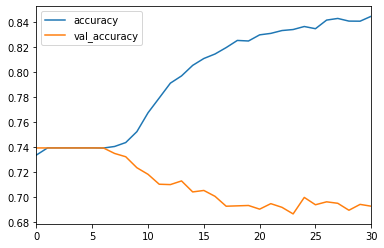

In [51]:
losses[['accuracy','val_accuracy']].plot()

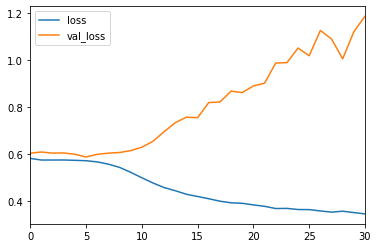

In [52]:
losses[['loss','val_loss']].plot()

In [53]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[1.1861558236412526, 0.69286966]


In [54]:
y_pred = model.predict_classes(X_test)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.08      0.12       892
           1       0.74      0.91      0.81      2530

    accuracy                           0.69      3422
   macro avg       0.49      0.50      0.47      3422
weighted avg       0.61      0.69      0.63      3422



In [56]:
accuracy_score(y_test, y_pred)

0.6928696668614845

In [57]:
model.save("../models/topic_soft_skill_vect_nn.h5")